Step 1: Clean the Price Column
	1.	Replace non-numeric characters:

In [5]:
import pandas as pd

# Load the data into DataFrame
calendar_df = pd.read_csv('/Users/stasy/Desktop/DSPortfolio/Project01/calendar.csv')

# Now, apply the cleaning steps
# Remove dollar signs, commas, and any spaces from the price column
calendar_df['price'] = calendar_df['price'].replace(r'[\$,]', '', regex=True).astype(str).str.replace(' ', '')

# Convert the price to numeric, forcing any errors to NaN
calendar_df['price'] = pd.to_numeric(calendar_df['price'], errors='coerce')

# Check for any remaining NaN values after conversion
print(calendar_df['price'].isna().sum())

# Optionally, drop rows with NaN values in the price column if they are not needed
calendar_df.dropna(subset=['price'], inplace=True)


# Remove dollar signs, commas, and any spaces from the price column
calendar_df['price'] = calendar_df['price'].replace(r'[\$,]', '', regex=True).astype(str).str.replace(' ', '')

# Convert the price to numeric, forcing any errors to NaN
calendar_df['price'] = pd.to_numeric(calendar_df['price'], errors='coerce')

0


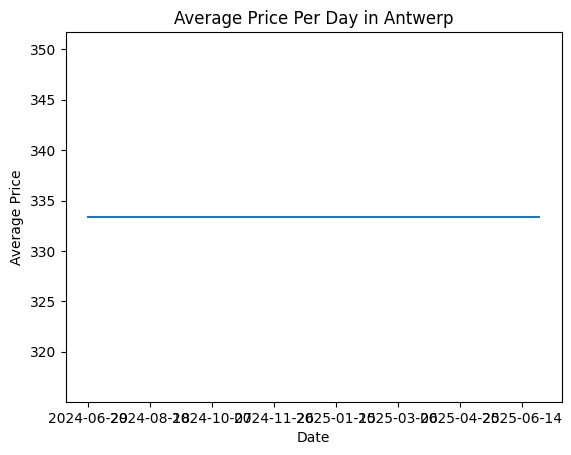

In [11]:
# Now calculate the average price per day
avg_price_per_day = calendar_df.groupby('date')['price'].mean()

# Plot the results
import matplotlib.pyplot as plt

avg_price_per_day.plot(title='Average Price Per Day in Antwerp')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.show()

In [13]:
# Check unique prices
unique_prices = calendar_df['price'].unique()
print(f"Number of unique prices: {len(unique_prices)}")
print(f"Unique prices: {unique_prices}")

Number of unique prices: 255
Unique prices: [1.7500e+02 1.0500e+02 4.5000e+01 7.5000e+01 3.1000e+01 1.9500e+02
 1.1000e+02 1.3000e+02 8.5000e+01 1.2700e+02 8.0000e+01 1.9900e+02
 1.2500e+02 2.0500e+02 7.7000e+01 1.1500e+02 6.0000e+01 4.0000e+01
 2.7000e+02 6.9000e+01 5.5000e+01 5.9000e+01 4.9000e+01 2.8000e+02
 3.5000e+01 6.5000e+01 6.8000e+01 2.0000e+02 3.6000e+01 1.5000e+02
 7.0000e+01 9.0000e+01 7.9000e+01 2.5000e+02 4.1000e+01 6.3000e+01
 1.9000e+02 1.8500e+02 9.5000e+01 9.9000e+01 1.6000e+02 1.2000e+02
 3.0900e+02 1.0000e+02 1.1600e+02 1.3500e+02 2.4000e+01 1.3900e+02
 5.6000e+01 5.3000e+01 7.5000e+02 4.2000e+01 5.0000e+02 1.7100e+02
 5.0000e+01 9.3000e+01 5.1500e+03 4.7500e+02 9.2000e+01 3.0000e+01
 1.9000e+01 2.9900e+02 3.8000e+01 1.5900e+02 2.2000e+02 1.5500e+02
 8.9000e+01 9.4000e+01 1.0600e+02 6.0000e+02 2.5000e+01 1.8000e+02
 1.0900e+02 8.2000e+01 7.8000e+01 1.2400e+02 7.4000e+01 6.7000e+01
 2.1000e+02 4.9900e+02 1.2900e+02 2.0700e+02 4.6000e+01 4.8000e+01
 1.4000e+02 1.5100

In [15]:
# Inspect data by date
sample_data = calendar_df.groupby('date')['price'].mean().reset_index()
print(sample_data.head(10))

         date       price
0  2024-06-29  333.373171
1  2024-06-30  333.373171
2  2024-07-01  333.373171
3  2024-07-02  333.373171
4  2024-07-03  333.373171
5  2024-07-04  333.373171
6  2024-07-05  333.373171
7  2024-07-06  333.373171
8  2024-07-07  333.373171
9  2024-07-08  333.373171


In [17]:
# Check for duplicate listings on the same date
duplicate_check = calendar_df.duplicated(subset=['date', 'listing_id'], keep=False)
print(f"Number of duplicates found: {duplicate_check.sum()}")

# Display a sample of these duplicates if any
if duplicate_check.sum() > 0:
    print(calendar_df[duplicate_check].head(10))

Number of duplicates found: 0


In [19]:
# Inspect price trends for a sample of listings
sample_listings = calendar_df['listing_id'].sample(5).values
for listing in sample_listings:
    listing_data = calendar_df[calendar_df['listing_id'] == listing]
    print(f"Listing ID: {listing}")
    print(listing_data[['date', 'price']].head(10))
    print("\n")

Listing ID: 707284890267625486
              date  price
507715  2024-06-29   96.0
507716  2024-06-30   96.0
507717  2024-07-01   96.0
507718  2024-07-02   96.0
507719  2024-07-03   96.0
507720  2024-07-04   96.0
507721  2024-07-05   96.0
507722  2024-07-06   96.0
507723  2024-07-07   96.0
507724  2024-07-08   96.0


Listing ID: 16723796
             date  price
81395  2024-06-29   70.0
81396  2024-06-30   70.0
81397  2024-07-01   70.0
81398  2024-07-02   70.0
81399  2024-07-03   70.0
81400  2024-07-04   70.0
81401  2024-07-05   70.0
81402  2024-07-06   70.0
81403  2024-07-07   70.0
81404  2024-07-08   70.0


Listing ID: 758709224825719762
              date  price
542390  2024-06-29   94.0
542391  2024-06-30   94.0
542392  2024-07-01   94.0
542393  2024-07-02   94.0
542394  2024-07-03   94.0
542395  2024-07-04   94.0
542396  2024-07-05   94.0
542397  2024-07-06   94.0
542398  2024-07-07   94.0
542399  2024-07-08   94.0


Listing ID: 1110739709678748621
              date  price
939145

In [21]:
# Group by neighborhood or room type
avg_price_by_neighborhood = calendar_df.groupby(['date', 'neighbourhood'])['price'].mean().unstack()
avg_price_by_neighborhood.plot(title='Average Price Per Day by Neighborhood')
plt.show()

KeyError: 'neighbourhood'

In [23]:
import matplotlib.pyplot as plt

# Group by date and neighborhood, then calculate the mean price
avg_price_by_neighborhood = calendar_df.groupby(['date', 'neighbourhood'])['price'].mean().unstack()

# Plot the result
avg_price_by_neighborhood.plot(title='Average Price Per Day by Neighborhood', figsize=(14, 7))
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.legend(title='Neighborhood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

KeyError: 'neighbourhood'

In [25]:
# Load the listings data
listings_df = pd.read_csv('/Users/stasy/Desktop/DSPortfolio/Project01/listings.csv')

# Merge calendar and listings data on 'listing_id' (or the appropriate column)
calendar_with_neighborhood_df = pd.merge(calendar_df, listings_df[['id', 'neighbourhood']], left_on='listing_id', right_on='id', how='left')

# Check if the merge was successful
print(calendar_with_neighborhood_df.head())

   listing_id        date available  price  adjusted_price  minimum_nights  \
0       50904  2024-06-29         f  175.0             NaN               2   
1       50904  2024-06-30         t  175.0             NaN               1   
2       50904  2024-07-01         t  175.0             NaN               1   
3       50904  2024-07-02         f  175.0             NaN               1   
4       50904  2024-07-03         t  175.0             NaN               1   

   maximum_nights     id neighbourhood  
0              60  50904           NaN  
1              60  50904           NaN  
2              60  50904           NaN  
3              60  50904           NaN  
4              60  50904           NaN  


In [27]:
# Load the neighbourhood data
neighbourhoods_df = pd.read_csv('/Users/stasy/Desktop/DSPortfolio/Project01/neighbourhoods.csv')
print(neighbourhoods_df.head())

   neighbourhood_group                 neighbourhood
0                  NaN            Amandus - Atheneum
1                  NaN        Borgerhout Extra Muros
2                  NaN  Borgerhout Intra Muros Noord
3                  NaN   Borgerhout Intra Muros Zuid
4                  NaN                     Brederode


In [31]:
!pip install geopandas
import geopandas as gpd

# Load the neighbourhood GeoJSON data
neighbourhoods_gdf = gpd.read_file('/Users/stasy/Desktop/DSPortfolio/Project01/neighbourhoods.geojson')
print(neighbourhoods_gdf.head())

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 5.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 2.4 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 10.7 MB/s eta 0:00:00
      neighbourhood neighbourhood_group  \
0        Haringrode                None   
1       Linkeroever                None   
2   Haven Antwerpen                None   
3      Haven Bezali                None   
4  Deurne Zuid Oost                None   

                                            geometry  
0  MULTIPOLYGON (((4.4287 51.20538, 4.42946 51.20...  
1  MULTIPOLYGON (((4.35099 51.23732, 4.35107 51.2...  
2  MULTIPOLYGON (((4.3554 51.31364, 4.35558 51.31...  
3  MULTIPOLYGON (((4.30183 51.36043, 4.30188 51.3...  
4  MULTIPOLYGON (((4.48178 51.21395, 4.48209 51.2...  


In [33]:

# Load the neighbourhood GeoJSON data
neighbourhoods_gdf = gpd.read_file('/Users/stasy/Desktop/DSPortfolio/Project01/neighbourhoods.geojson')
print(neighbourhoods_gdf.head())

      neighbourhood neighbourhood_group  \
0        Haringrode                None   
1       Linkeroever                None   
2   Haven Antwerpen                None   
3      Haven Bezali                None   
4  Deurne Zuid Oost                None   

                                            geometry  
0  MULTIPOLYGON (((4.4287 51.20538, 4.42946 51.20...  
1  MULTIPOLYGON (((4.35099 51.23732, 4.35107 51.2...  
2  MULTIPOLYGON (((4.3554 51.31364, 4.35558 51.31...  
3  MULTIPOLYGON (((4.30183 51.36043, 4.30188 51.3...  
4  MULTIPOLYGON (((4.48178 51.21395, 4.48209 51.2...  


In [35]:
# Ensure the GeoDataFrame is in the correct format
neighbourhoods_gdf = neighbourhoods_gdf[['neighbourhood', 'geometry']]

# Merge listings data with neighborhood GeoDataFrame
listings_with_neighbourhood_df = pd.merge(listings_df, neighbourhoods_gdf, how='left', left_on='neighbourhood_column_in_listings', right_on='neighbourhood')

# Check the merge result
print(listings_with_neighbourhood_df.head())

KeyError: 'neighbourhood_column_in_listings'

In [37]:
print(listings_df.columns)

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [39]:
# Merge listings data with neighborhood GeoDataFrame using 'neighbourhood_cleansed'
listings_with_neighbourhood_df = pd.merge(listings_df, neighbourhoods_gdf, how='left', left_on='neighbourhood_cleansed', right_on='neighbourhood')

# Check the merge result
print(listings_with_neighbourhood_df.head())

                    id                                       listing_url  \
0  1139844543126920712  https://www.airbnb.com/rooms/1139844543126920712   
1  1153093110246584364  https://www.airbnb.com/rooms/1153093110246584364   
2  1162004759190159606  https://www.airbnb.com/rooms/1162004759190159606   
3  1168244754511783859  https://www.airbnb.com/rooms/1168244754511783859   
4  1171648968667239406  https://www.airbnb.com/rooms/1171648968667239406   

        scrape_id last_scraped           source  \
0  20240629050332   2024-06-29      city scrape   
1  20240629050332   2024-06-29  previous scrape   
2  20240629050332   2024-06-29      city scrape   
3  20240629050332   2024-06-29      city scrape   
4  20240629050332   2024-06-29      city scrape   

                            name  \
0    Private studio in Zurenborg   
1  Mooi en lichtrijk appartement   
2                 Antwerpstay 11   
3  Nice appartement met 4 bedden   
4                 Antwerpstay 14   

                   

In [41]:
# Merge calendar data with enriched listings data
calendar_with_neighbourhood_df = pd.merge(calendar_df, listings_with_neighbourhood_df[['id', 'neighbourhood_cleansed']], left_on='listing_id', right_on='id', how='left')

# Check if the merge was successful
print(calendar_with_neighbourhood_df.head())

   listing_id        date available  price  adjusted_price  minimum_nights  \
0       50904  2024-06-29         f  175.0             NaN               2   
1       50904  2024-06-30         t  175.0             NaN               1   
2       50904  2024-07-01         t  175.0             NaN               1   
3       50904  2024-07-02         f  175.0             NaN               1   
4       50904  2024-07-03         t  175.0             NaN               1   

   maximum_nights     id neighbourhood_cleansed  
0              60  50904     Historisch Centrum  
1              60  50904     Historisch Centrum  
2              60  50904     Historisch Centrum  
3              60  50904     Historisch Centrum  
4              60  50904     Historisch Centrum  


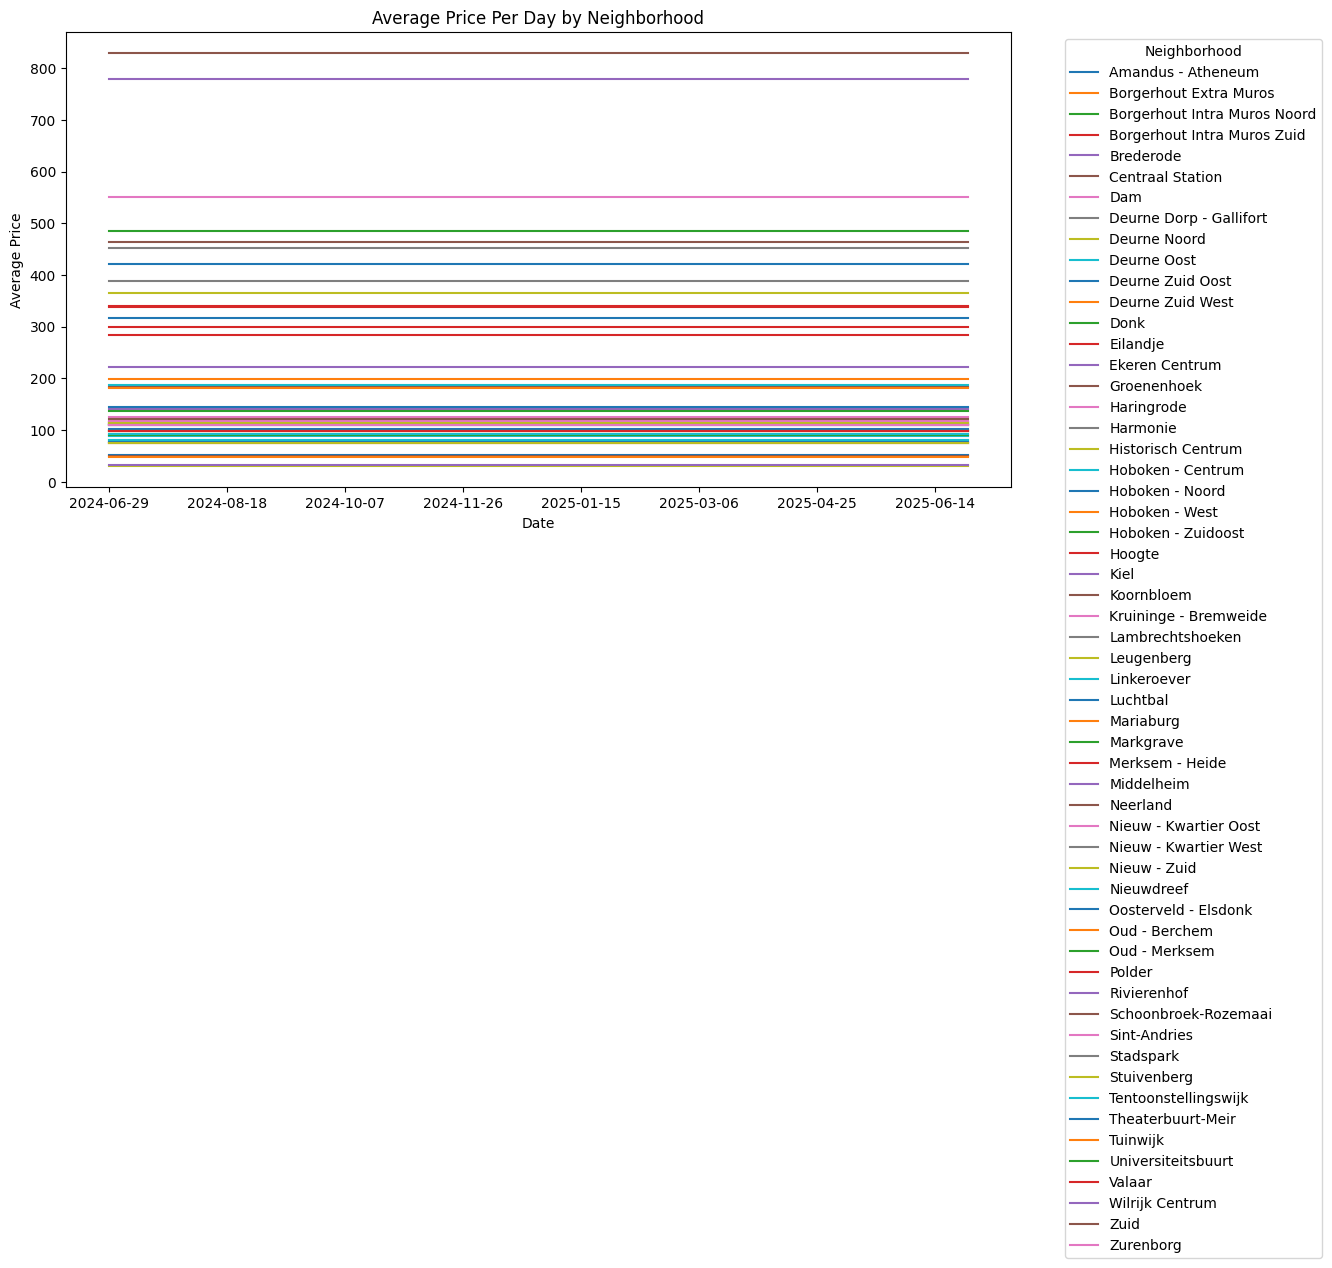

In [47]:
# Adjust the margins manually
avg_price_by_neighbourhood.plot(title='Average Price Per Day by Neighborhood', figsize=(14, 7))
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.legend(title='Neighborhood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.subplots_adjust(bottom=0.2, top=0.85, right=0.8)  # Adjust margins as needed
plt.show()

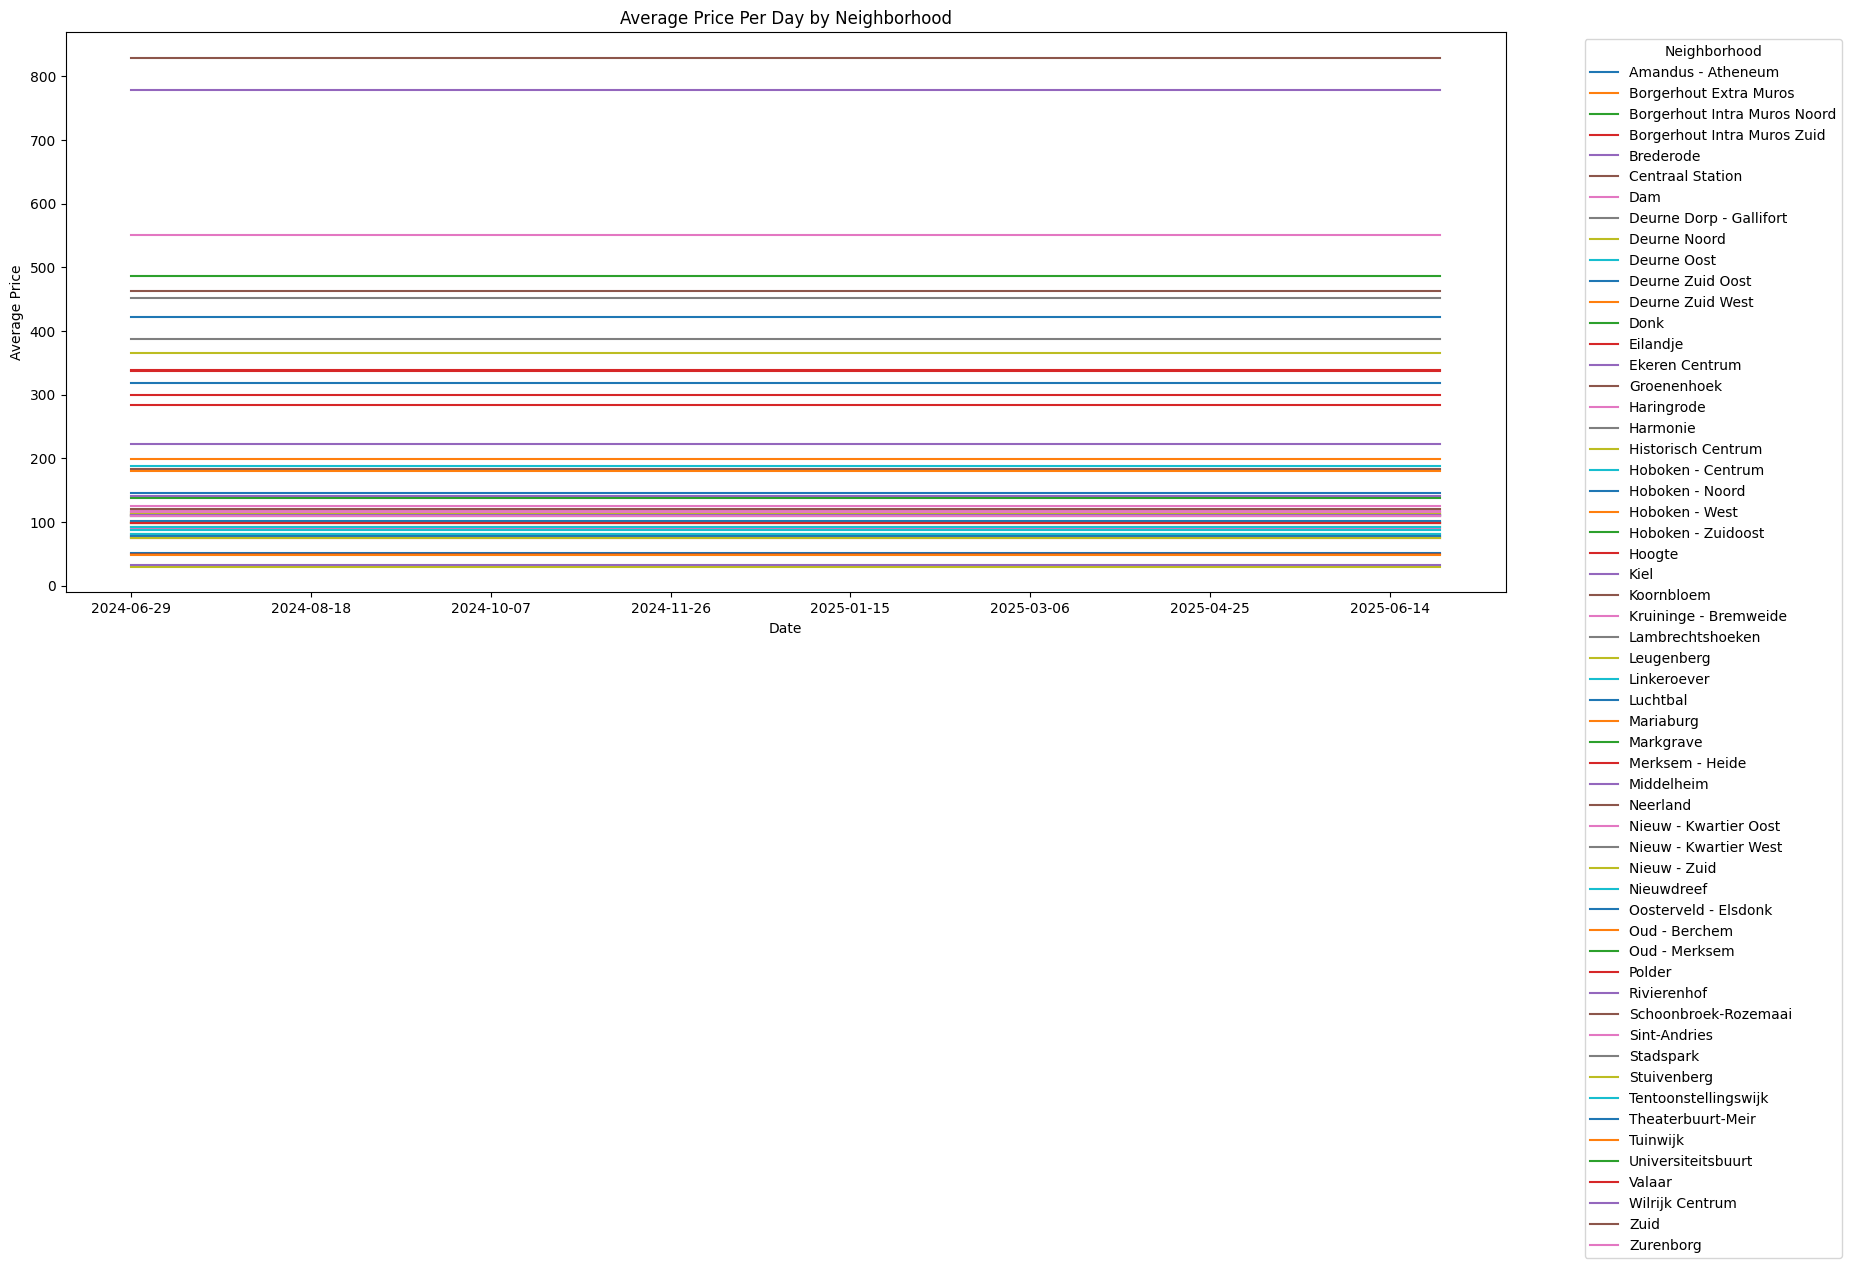

In [53]:
avg_price_by_neighbourhood.plot(title='Average Price Per Day by Neighborhood', figsize=(16, 8))
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.legend(title='Neighborhood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.subplots_adjust(top=0.85, bottom=0.15, left=0.05, right=0.95)  # Adjust these values as needed
plt.show()

    2. Check the Conversion: 

In [7]:
# Check for any remaining NaN values after conversion
print(calendar_df['price'].isna().sum())

# Optionally, drop rows with NaN values in the price column if they are not needed
calendar_df.dropna(subset=['price'], inplace=True)

0


Step 2: Perform the Group By and Mean Calculation

<Axes: title={'center': 'Average Price Per Day in Antwerp'}, xlabel='date'>

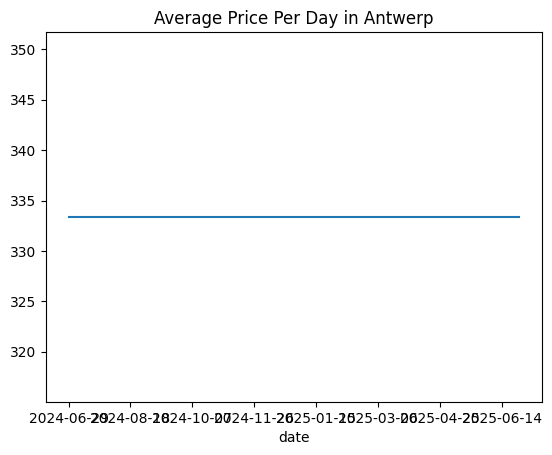

In [9]:
# Now calculate the average price per day
avg_price_per_day = calendar_df.groupby('date')['price'].mean()

# Plot the results
avg_price_per_day.plot(title='Average Price Per Day in Antwerp')

Step 3: Run the Updated Script

In [ ]:
python /Users/stasy/Desktop/DSPortfolio/Project01/EDA01.py

In [59]:
# Group by neighborhood and property type, then calculate the mean price
avg_price_by_neighborhood_property = listings_with_neighbourhood_df.groupby(['neighbourhood_y', 'property_type'])['price'].mean().unstack()

# Plot the result
avg_price_by_neighborhood_property.plot(kind='bar', figsize=(14, 7), title='Average Price by Neighborhood and Property Type')
plt.ylabel('Average Price')
plt.tight_layout()
plt.show()

TypeError: agg function failed [how->mean,dtype->object]

In [61]:
# Remove any potential non-numeric characters from the price column
listings_with_neighbourhood_df['price'] = listings_with_neighbourhood_df['price'].replace(r'[\$,]', '', regex=True)

# Convert the price column to numeric, forcing errors to NaN
listings_with_neighbourhood_df['price'] = pd.to_numeric(listings_with_neighbourhood_df['price'], errors='coerce')

# Check for any NaN values after conversion and consider dropping them
print(f"Number of NaN values in price column: {listings_with_neighbourhood_df['price'].isna().sum()}")
listings_with_neighbourhood_df.dropna(subset=['price'], inplace=True)

Number of NaN values in price column: 424


In [63]:
# Display rows where price is NaN
nan_prices = listings_with_neighbourhood_df[listings_with_neighbourhood_df['price'].isna()]
print(nan_prices[['neighbourhood_y', 'property_type', 'price']].head(10))

Empty DataFrame
Columns: [neighbourhood_y, property_type, price]
Index: []


In [65]:
# Check for NaN values in the original listings DataFrame before any merging
nan_prices_original = listings_df[listings_df['price'].isna()]
print(f"Number of NaN values in original listings DataFrame: {len(nan_prices_original)}")

Number of NaN values in original listings DataFrame: 424


Option 1: Drop rows with NaN prices before merging
Option 2: Fill NaN values with a placeholder (e.g., median price)

In [69]:
#option1
listings_df.dropna(subset=['price'], inplace=True)

In [71]:
# Merge listings data with neighborhood GeoDataFrame after handling NaN values
listings_with_neighbourhood_df = pd.merge(listings_df, neighbourhoods_gdf, how='left', left_on='neighbourhood_cleansed', right_on='neighbourhood')

In [73]:
# Group by neighborhood and property type, then calculate the mean price
avg_price_by_neighborhood_property = listings_with_neighbourhood_df.groupby(['neighbourhood_y', 'property_type'])['price'].mean().unstack()

# Plot the result
avg_price_by_neighborhood_property.plot(kind='bar', figsize=(14, 7), title='Average Price by Neighborhood and Property Type')
plt.ylabel('Average Price')
plt.tight_layout()
plt.show()

TypeError: agg function failed [how->mean,dtype->object]

In [75]:
# Ensure the price column is a string
listings_with_neighbourhood_df['price'] = listings_with_neighbourhood_df['price'].astype(str)

# Remove dollar signs, commas, and any other non-numeric characters
listings_with_neighbourhood_df['price'] = listings_with_neighbourhood_df['price'].replace(r'[^\d.]', '', regex=True)

# Convert the price column to numeric, forcing any errors to NaN
listings_with_neighbourhood_df['price'] = pd.to_numeric(listings_with_neighbourhood_df['price'], errors='coerce')

# Drop rows with NaN prices, as they can't be used in numeric calculations
listings_with_neighbourhood_df.dropna(subset=['price'], inplace=True)

In [77]:
# Check the first few rows of the cleaned price column
print(listings_with_neighbourhood_df['price'].head())

0     99.0
1     72.0
2    121.0
3     75.0
4     81.0
Name: price, dtype: float64


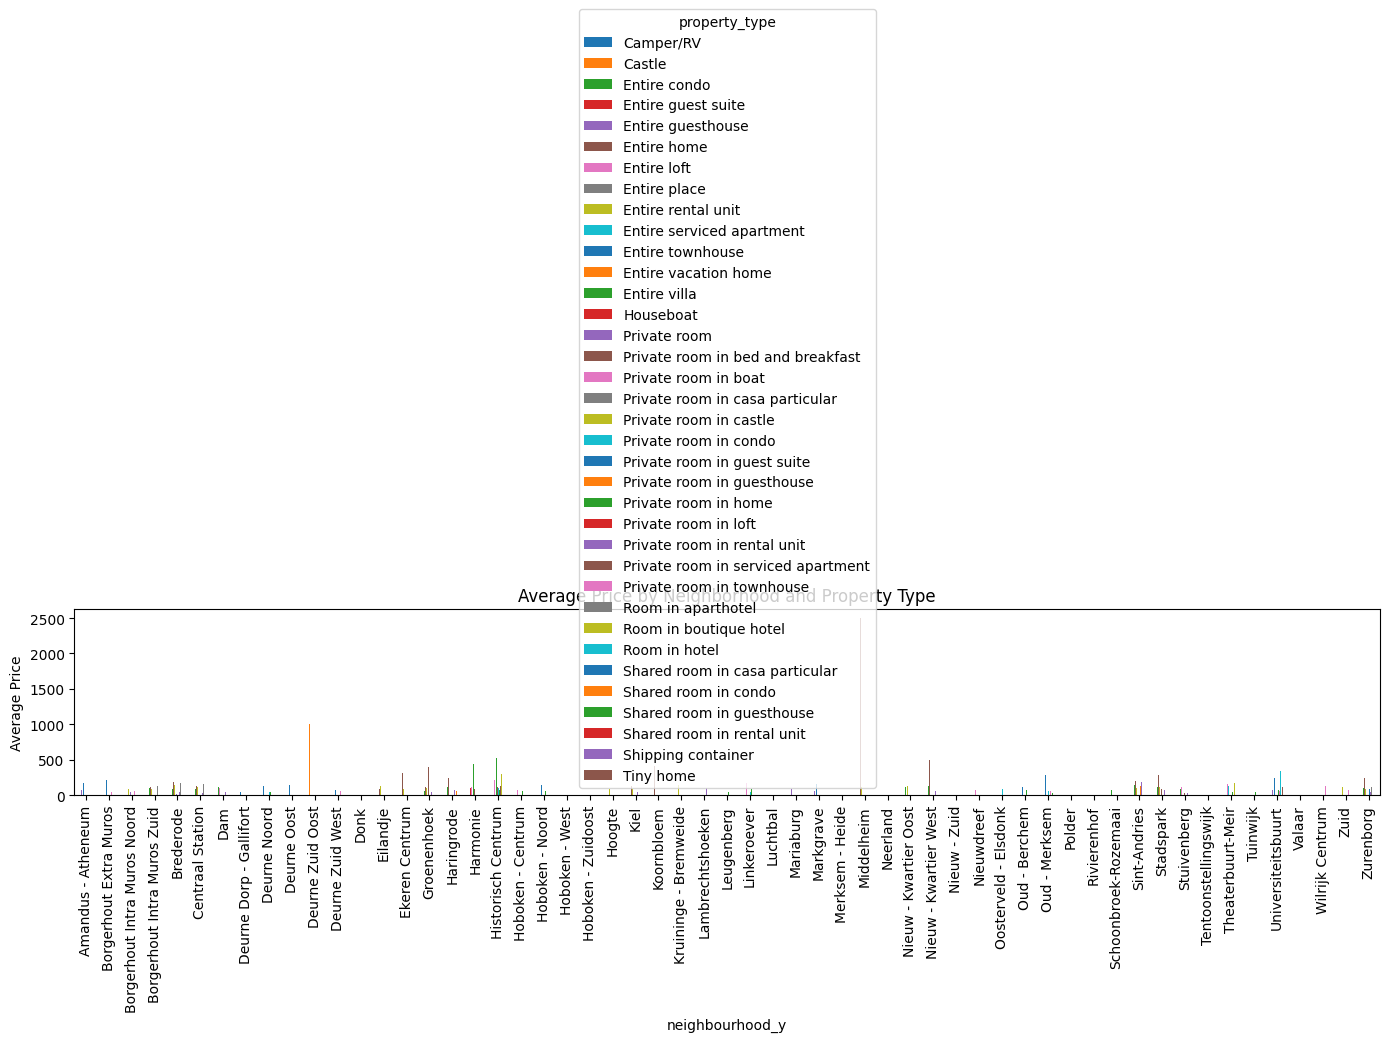

In [79]:
# Group by neighborhood and property type, then calculate the mean price
avg_price_by_neighborhood_property = listings_with_neighbourhood_df.groupby(['neighbourhood_y', 'property_type'])['price'].mean().unstack()

# Plot the result
avg_price_by_neighborhood_property.plot(kind='bar', figsize=(14, 7), title='Average Price by Neighborhood and Property Type')
plt.ylabel('Average Price')
plt.tight_layout()
plt.show()

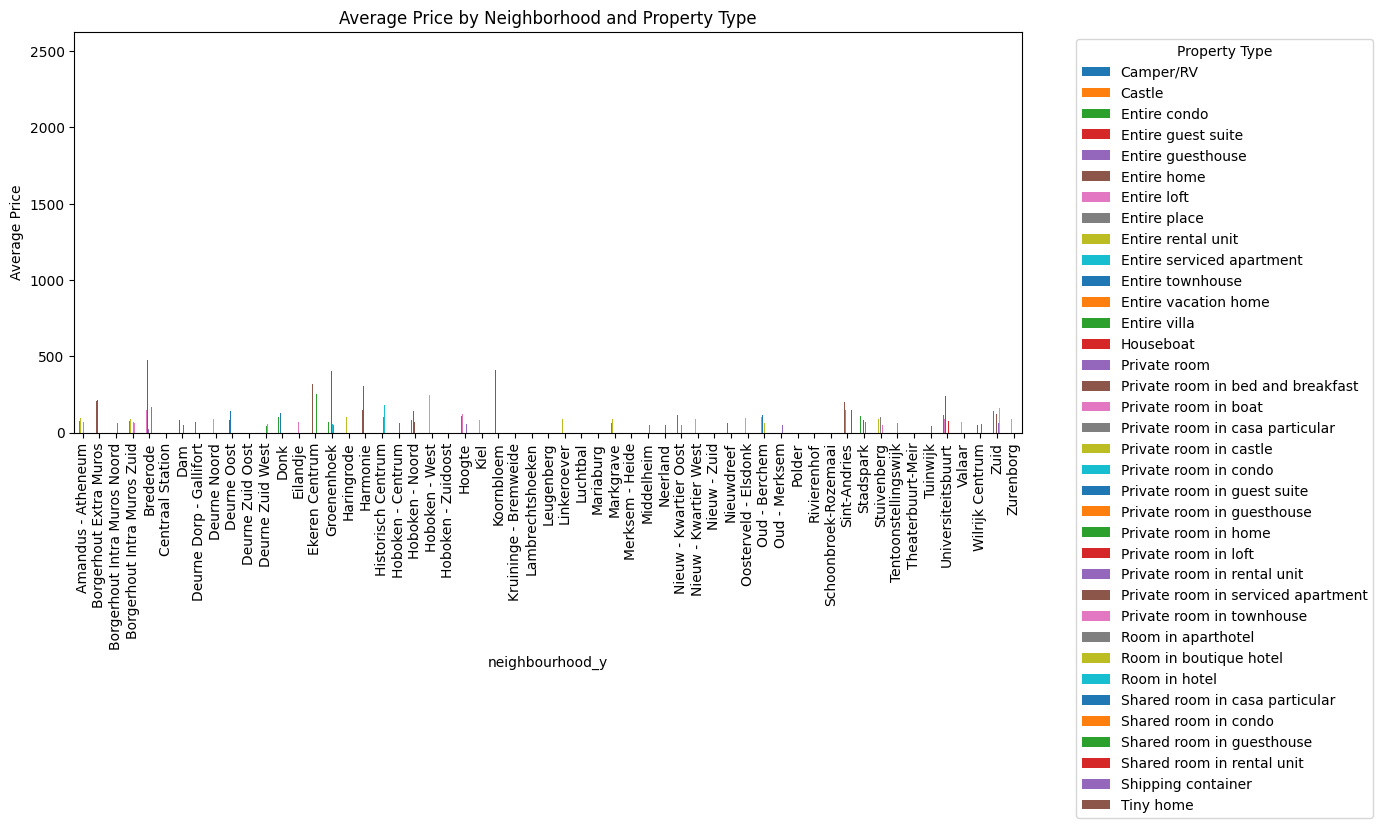

In [81]:
# Plot the result
ax = avg_price_by_neighborhood_property.plot(kind='bar', figsize=(14, 7), title='Average Price by Neighborhood and Property Type')

# Move the legend to the outside of the plot
ax.legend(title='Property Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.ylabel('Average Price')
plt.tight_layout()
plt.show()

Calculate and compare the highest/lowest price against average

In [83]:
# Find the highest average price
max_avg_price = avg_price_by_neighborhood_property.max().max()
print(f"The highest average price is: ${max_avg_price:.2f}")

The highest average price is: $2500.00


In [85]:
# Sort the average prices by descending order
sorted_avg_price = avg_price_by_neighborhood_property.stack().sort_values(ascending=False).reset_index()
sorted_avg_price.columns = ['neighbourhood', 'property_type', 'average_price']

# Display the sorted result
print(sorted_avg_price.head(10))  # Display top 10 entries as an example

                 neighbourhood              property_type  average_price
0                   Middelheim                Entire home    2500.000000
1             Deurne Zuid Oost                     Castle    1007.000000
2                    Stadspark           Entire townhouse     549.000000
3           Historisch Centrum               Entire villa     528.000000
4  Borgerhout Intra Muros Zuid               Entire villa     500.000000
5        Nieuw - Kwartier West                Entire home     495.000000
6             Centraal Station  Entire serviced apartment     485.695652
7                    Brederode           Entire townhouse     473.500000
8                     Harmonie               Entire villa     443.000000
9            Theaterbuurt-Meir                Entire home     432.444444


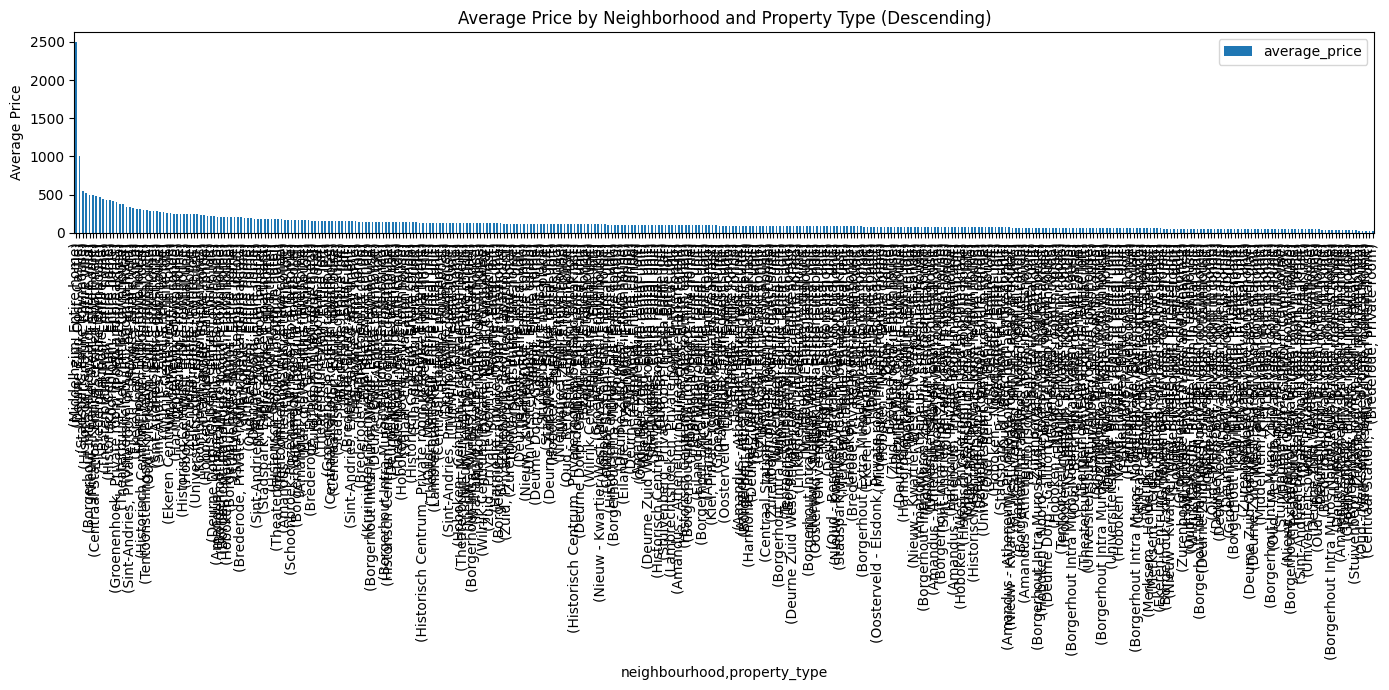

In [87]:
# Plot the sorted average prices
ax = sorted_avg_price.set_index(['neighbourhood', 'property_type']).plot(kind='bar', figsize=(14, 7), title='Average Price by Neighborhood and Property Type (Descending)')
ax.set_ylabel('Average Price')
plt.tight_layout()
plt.show()

In [89]:
# Calculate the average price for each neighborhood
avg_price_by_neighborhood = listings_with_neighbourhood_df.groupby('neighbourhood_y')['price'].mean()

# Identify the neighborhood with the highest average price
highest_avg_price_neighborhood = avg_price_by_neighborhood.idxmax()
highest_avg_price_value = avg_price_by_neighborhood.max()

print(f"Highest average price neighborhood: {highest_avg_price_neighborhood} with an average price of {highest_avg_price_value}")

# Remove the neighborhood with the highest average price
filtered_avg_price_by_neighborhood = avg_price_by_neighborhood.drop(highest_avg_price_neighborhood)

# Sort the remaining neighborhoods by average price in descending order
sorted_filtered_avg_price = filtered_avg_price_by_neighborhood.sort_values(ascending=False)

# Display the result
print(sorted_filtered_avg_price)

Highest average price neighborhood: Polder with an average price of 384.0
neighbourhood_y
Middelheim                      382.888889
Ekeren Centrum                  218.666667
Hoboken - West                  203.250000
Koornbloem                      193.750000
Deurne Zuid Oost                174.200000
Centraal Station                169.985507
Hoboken - Zuidoost              168.500000
Theaterbuurt-Meir               157.238994
Brederode                       148.404255
Kruininge - Bremweide           146.000000
Tentoonstellingswijk            144.071429
Historisch Centrum              142.659401
Stadspark                       133.813725
Eilandje                        131.491228
Harmonie                        131.457627
Zuid                            128.878049
Haringrode                      128.771930
Nieuw - Zuid                    126.125000
Sint-Andries                    124.592357
Lambrechtshoeken                123.750000
Schoonbroek-Rozemaai            121.000000
Donk   

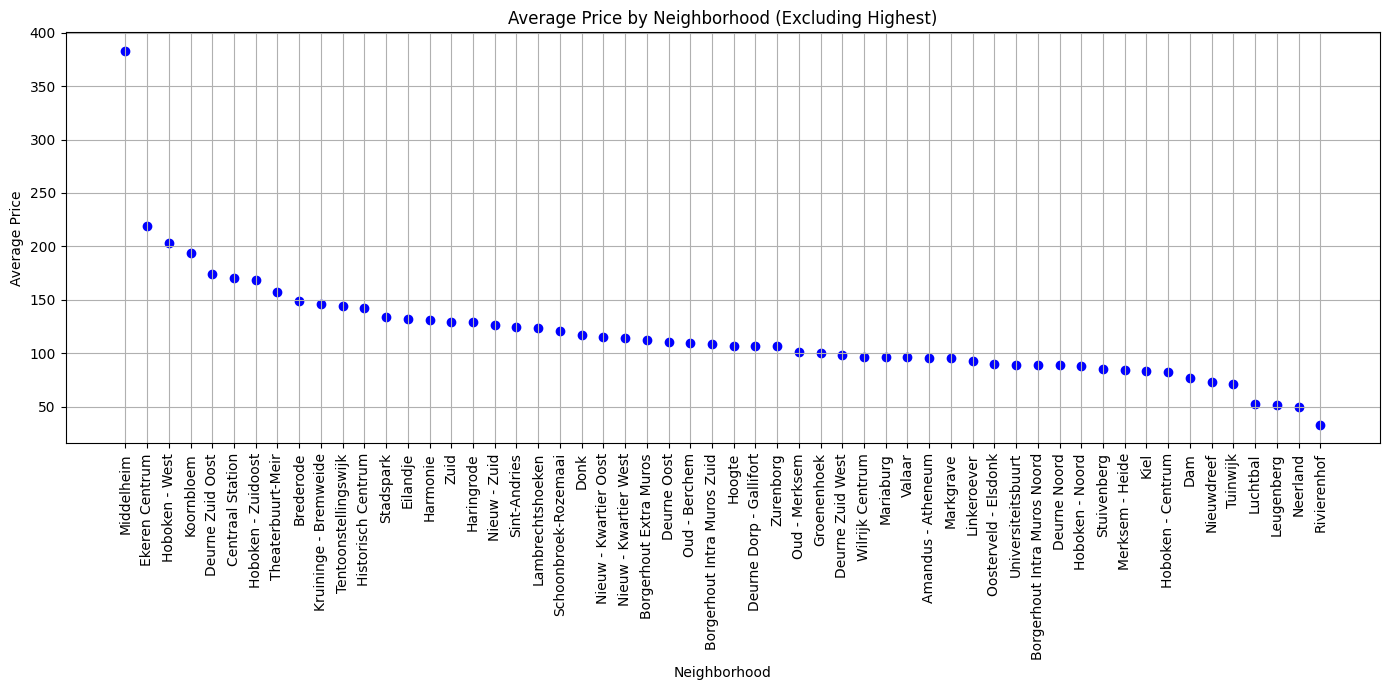

In [91]:
import matplotlib.pyplot as plt

# Scatter plot of average price by neighborhood
plt.figure(figsize=(14, 7))
plt.scatter(sorted_filtered_avg_price.index, sorted_filtered_avg_price.values, color='blue')
plt.title('Average Price by Neighborhood (Excluding Highest)')
plt.xlabel('Neighborhood')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

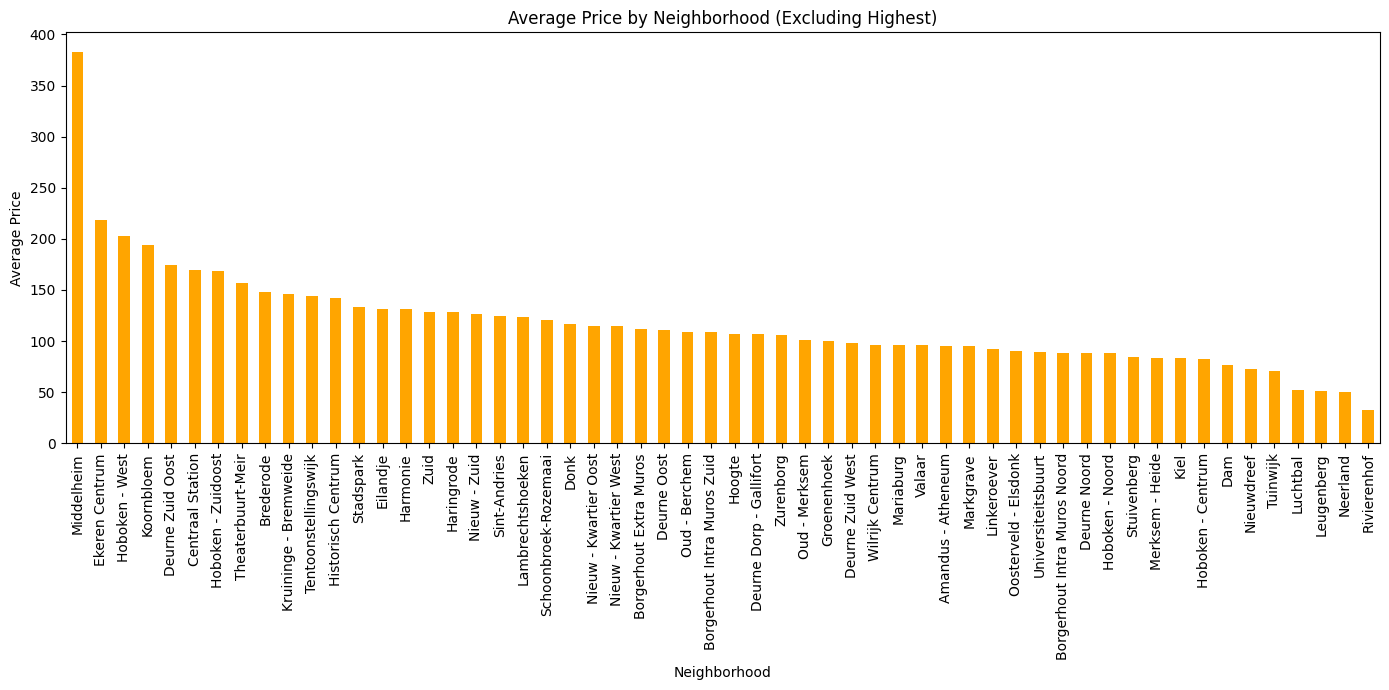

In [93]:
# Bar chart of average price by neighborhood
plt.figure(figsize=(14, 7))
sorted_filtered_avg_price.plot(kind='bar', color='orange')
plt.title('Average Price by Neighborhood (Excluding Highest)')
plt.xlabel('Neighborhood')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

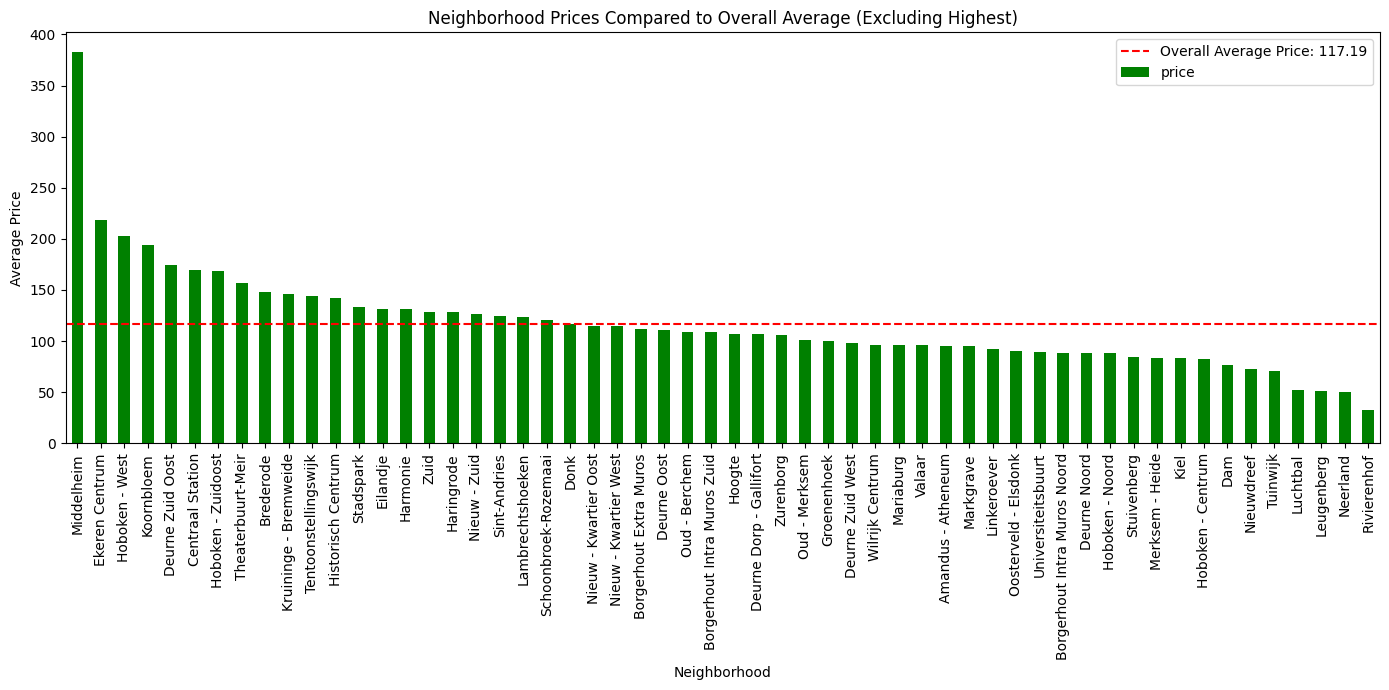

In [95]:
# Calculate the overall average price (excluding the highest neighborhood)
overall_avg_price = sorted_filtered_avg_price.mean()

# Bar chart comparing each neighborhood's average price to the overall average
plt.figure(figsize=(14, 7))
sorted_filtered_avg_price.plot(kind='bar', color='green')
plt.axhline(y=overall_avg_price, color='red', linestyle='--', label=f'Overall Average Price: {overall_avg_price:.2f}')
plt.title('Neighborhood Prices Compared to Overall Average (Excluding Highest)')
plt.xlabel('Neighborhood')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

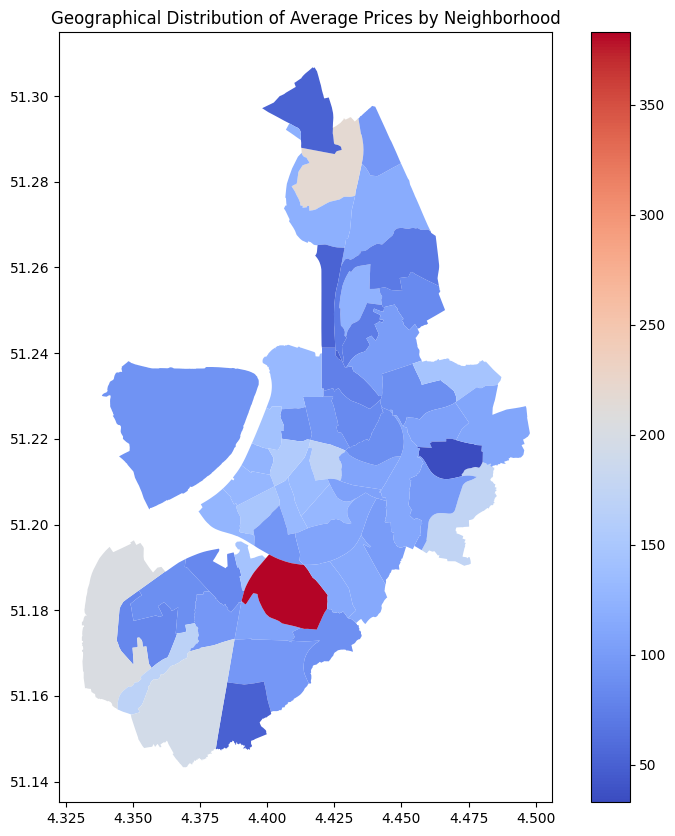

In [97]:
import geopandas as gpd

# Merge the filtered average prices back with the GeoDataFrame
filtered_neighborhoods_gdf = neighbourhoods_gdf.set_index('neighbourhood').join(sorted_filtered_avg_price)

# Plot the neighborhoods on the map with the average prices
filtered_neighborhoods_gdf.plot(column='price', cmap='coolwarm', legend=True, figsize=(10, 10))
plt.title('Geographical Distribution of Average Prices by Neighborhood')
plt.show()

<Figure size 1000x1000 with 0 Axes>

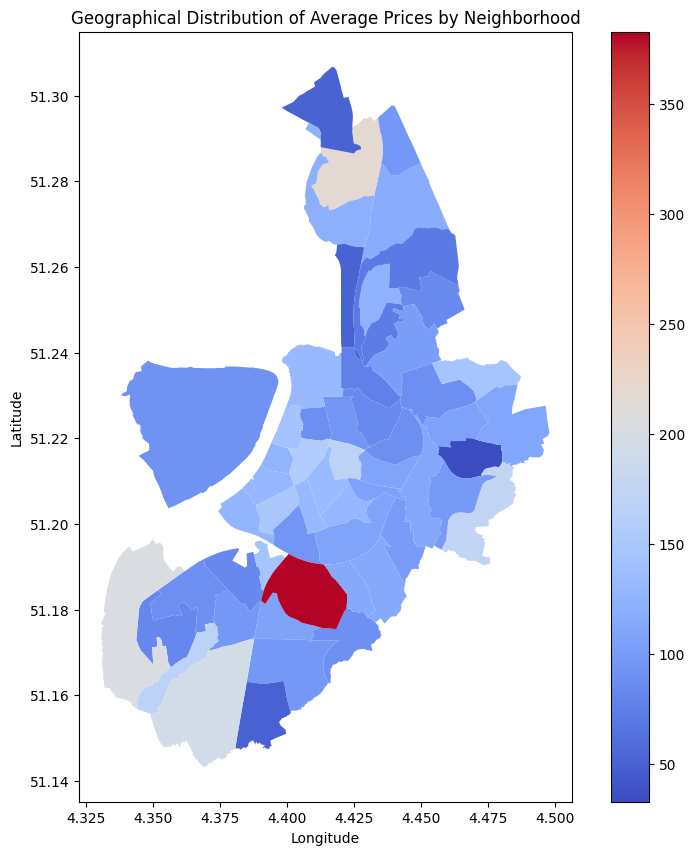

In [99]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Merge the filtered average prices back with the GeoDataFrame
filtered_neighborhoods_gdf = neighbourhoods_gdf.set_index('neighbourhood').join(sorted_filtered_avg_price)

# Create the plot
plt.figure(figsize=(10, 10))
ax = filtered_neighborhoods_gdf.plot(column='price', cmap='coolwarm', legend=True, figsize=(10, 10))

# Set the title and labels for the axes
ax.set_title('Geographical Distribution of Average Prices by Neighborhood')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()

AttributeError: 'NoneType' object has no attribute 'set_title'

<Figure size 1000x1000 with 0 Axes>

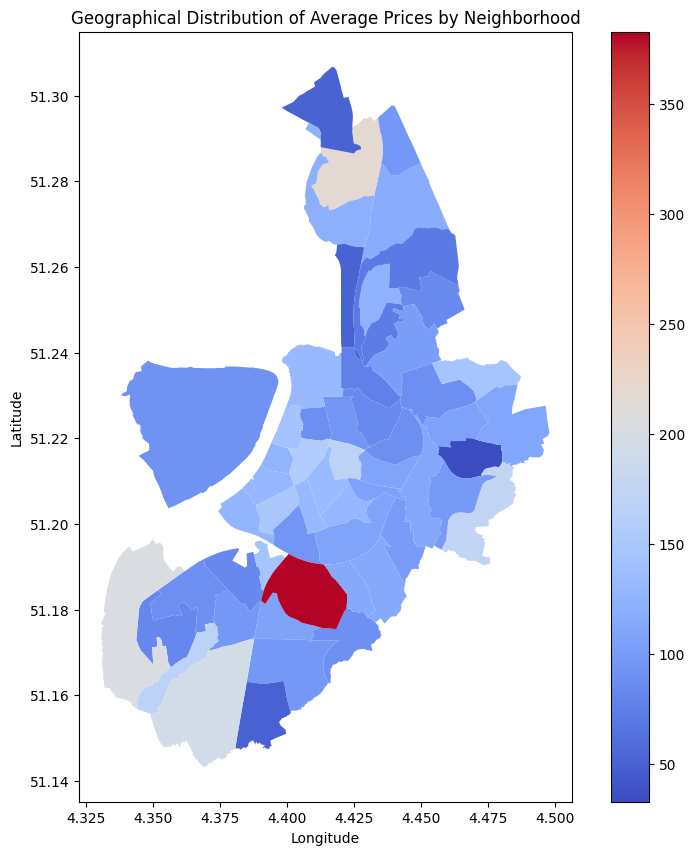

In [101]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Merge the filtered average prices back with the GeoDataFrame
filtered_neighborhoods_gdf = neighbourhoods_gdf.set_index('neighbourhood').join(sorted_filtered_avg_price)

# Create the plot
plt.figure(figsize=(10, 10))
ax = filtered_neighborhoods_gdf.plot(column='price', cmap='coolwarm', legend=True, figsize=(10, 10))

# Set the title and labels for the axes
ax.set_title('Geographical Distribution of Average Prices by Neighborhood')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Customize the legend to include the unit ($)
legend = ax.get_legend()
legend.set_title('Average Price ($)')
legend.set_bbox_to_anchor((1, 0.6))  # Adjust position if needed

# Show the plot
plt.show()

<Figure size 600x600 with 0 Axes>

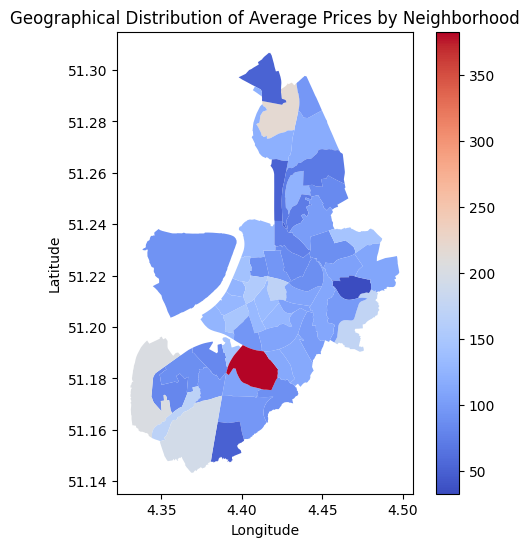

In [103]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Merge the filtered average prices back with the GeoDataFrame
filtered_neighborhoods_gdf = neighbourhoods_gdf.set_index('neighbourhood').join(sorted_filtered_avg_price)

# Create the plot with a smaller size
plt.figure(figsize=(6, 6))  # Adjust the size to make it smaller
ax = filtered_neighborhoods_gdf.plot(column='price', cmap='coolwarm', legend=True, figsize=(6, 6))

# Set the title and labels for the axes
ax.set_title('Geographical Distribution of Average Prices by Neighborhood')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()

In [3]:
import pandas as pd

# Load the data from CSV files
calendar_df = pd.read_csv('calendar.csv')
listings_df = pd.read_csv('listings.csv')
neighbourhoods_df = pd.read_csv('neighbourhoods.csv')

# Merge listings with calendar to get the date, price, and neighborhood information
merged_df = pd.merge(calendar_df, listings_df, left_on='listing_id', right_on='id')

# Further merge with the neighbourhoods DataFrame if needed
merged_df = pd.merge(merged_df, neighbourhoods_df, on='neighbourhood_id')

# Convert the 'date' column to datetime format
merged_df['date'] = pd.to_datetime(merged_df['date'])

# Convert price to numeric, remove any currency symbols or commas first
merged_df['price'] = merged_df['price'].replace('[\$,]', '', regex=True).astype(float)

<>:18: SyntaxWarning: invalid escape sequence '\$'
<>:18: SyntaxWarning: invalid escape sequence '\$'
/var/folders/4w/1_78yxl52ljbbfg2n9v2x3g80000gn/T/ipykernel_32461/3510092069.py:18: SyntaxWarning: invalid escape sequence '\$'
  merged_df['price'] = merged_df['price'].replace('[\$,]', '', regex=True).astype(float)


KeyError: 'neighbourhood_id'

In [5]:
import pandas as pd

# Load the data from CSV files
calendar_df = pd.read_csv('calendar.csv')
listings_df = pd.read_csv('listings.csv')
neighbourhoods_df = pd.read_csv('neighbourhoods.csv')

# Inspect the columns to ensure correct merging keys
print(calendar_df.columns)
print(listings_df.columns)
print(neighbourhoods_df.columns)

# Merge listings with calendar to get the date, price, and neighborhood information
merged_df = pd.merge(calendar_df, listings_df, left_on='listing_id', right_on='id')

# Use the appropriate column for merging with the neighbourhoods DataFrame
# Assuming 'neighbourhood' is the correct key
merged_df = pd.merge(merged_df, neighbourhoods_df, on='neighbourhood')

# Convert the 'date' column to datetime format
merged_df['date'] = pd.to_datetime(merged_df['date'])

# Fix the price conversion issue with a raw string
merged_df['price'] = merged_df['price'].replace(r'[\$,]', '', regex=True).astype(float)

# Continue with the rest of the analysis as planned

Index(['listing_id', 'date', 'available', 'price', 'adjusted_price',
       'minimum_nights', 'maximum_nights'],
      dtype='object')
Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_min

KeyError: 'price'

In [7]:
import pandas as pd

# Load the data from CSV files
calendar_df = pd.read_csv('calendar.csv')
listings_df = pd.read_csv('listings.csv')
neighbourhoods_df = pd.read_csv('neighbourhoods.csv')

# Inspect the columns to ensure correct merging keys
print(calendar_df.columns)
print(listings_df.columns)
print(neighbourhoods_df.columns)

# Merge listings with calendar, adding suffixes to avoid column name conflicts
merged_df = pd.merge(calendar_df, listings_df, left_on='listing_id', right_on='id', suffixes=('_calendar', '_listing'))

# Use the appropriate column for merging with the neighbourhoods DataFrame
merged_df = pd.merge(merged_df, neighbourhoods_df, on='neighbourhood')

# Convert the 'date' column to datetime format
merged_df['date'] = pd.to_datetime(merged_df['date'])

# Fix the price conversion issue with a raw string, using the correct 'price' column
merged_df['price'] = merged_df['price_calendar'].replace(r'[\$,]', '', regex=True).astype(float)

# Continue with the rest of the analysis as planned

Index(['listing_id', 'date', 'available', 'price', 'adjusted_price',
       'minimum_nights', 'maximum_nights'],
      dtype='object')
Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_min

In [9]:
# Calculate the average price per neighborhood
average_prices = merged_df.groupby('neighbourhood')['price'].mean().sort_values()

# Identify the most expensive, cheapest, and middle-priced neighborhoods
most_expensive_neighborhood = average_prices.idxmax()
cheapest_neighborhood = average_prices.idxmin()
median_price = average_prices.median()
middle_neighborhood = average_prices.sub(median_price).abs().idxmin()

# Print the selected neighborhoods for verification
print("Most Expensive Neighborhood:", most_expensive_neighborhood)
print("Cheapest Neighborhood:", cheapest_neighborhood)
print("Middle-Priced Neighborhood:", middle_neighborhood)

ValueError: attempt to get argmax of an empty sequence

In [11]:
# Check if there are missing values in the 'price' column
print(merged_df['price'].isnull().sum())

# Print a summary of the merged DataFrame
print(merged_df.describe())

# Optionally, drop rows where 'price' is NaN
merged_df = merged_df.dropna(subset=['price'])

0
       listing_id date  adjusted_price  minimum_nights_calendar  \
count         0.0    0             0.0                      0.0   
mean          NaN  NaT             NaN                      NaN   
min           NaN  NaT             NaN                      NaN   
25%           NaN  NaT             NaN                      NaN   
50%           NaN  NaT             NaN                      NaN   
75%           NaN  NaT             NaN                      NaN   
max           NaN  NaT             NaN                      NaN   
std           NaN  NaN             NaN                      NaN   

       maximum_nights_calendar   id  scrape_id  host_id  host_listings_count  \
count                      0.0  0.0        0.0      0.0                  0.0   
mean                       NaN  NaN        NaN      NaN                  NaN   
min                        NaN  NaN        NaN      NaN                  NaN   
25%                        NaN  NaN        NaN      NaN                  N

In [13]:
# Check for missing values in key columns of each DataFrame
print(calendar_df[['listing_id']].isnull().sum())
print(listings_df[['id']].isnull().sum())
print(neighbourhoods_df[['neighbourhood']].isnull().sum())

# Display the unique values in the key columns to see if they can match
print(calendar_df['listing_id'].unique()[:5])
print(listings_df['id'].unique()[:5])
print(neighbourhoods_df['neighbourhood'].unique()[:5])

listing_id    0
dtype: int64
id    0
dtype: int64
neighbourhood    0
dtype: int64
[ 50904 224682 345959 363155 366252]
[1139844543126920712 1153093110246584364 1162004759190159606
 1168244754511783859 1171648968667239406]
['Amandus - Atheneum' 'Borgerhout Extra Muros'
 'Borgerhout Intra Muros Noord' 'Borgerhout Intra Muros Zuid' 'Brederode']


In [15]:
# Ensure both listing_id and id are the same type
calendar_df['listing_id'] = calendar_df['listing_id'].astype(str)
listings_df['id'] = listings_df['id'].astype(str)

In [17]:
# Check the first few rows to confirm the type conversion
print(calendar_df['listing_id'].head())
print(listings_df['id'].head())

# Check the data types to ensure the conversion was successful
print(calendar_df['listing_id'].dtype)
print(listings_df['id'].dtype)

0    50904
1    50904
2    50904
3    50904
4    50904
Name: listing_id, dtype: object
0    1139844543126920712
1    1153093110246584364
2    1162004759190159606
3    1168244754511783859
4    1171648968667239406
Name: id, dtype: object
object
object


In [19]:
# Inspect the first few rows of each DataFrame to identify potential matching columns
print(calendar_df.head())
print(listings_df.head())
print(neighbourhoods_df.head())

  listing_id        date available    price  adjusted_price  minimum_nights  \
0      50904  2024-06-29         f  $175.00             NaN               2   
1      50904  2024-06-30         t  $175.00             NaN               1   
2      50904  2024-07-01         t  $175.00             NaN               1   
3      50904  2024-07-02         f  $175.00             NaN               1   
4      50904  2024-07-03         t  $175.00             NaN               1   

   maximum_nights  
0              60  
1              60  
2              60  
3              60  
4              60  
                    id                                       listing_url  \
0  1139844543126920712  https://www.airbnb.com/rooms/1139844543126920712   
1  1153093110246584364  https://www.airbnb.com/rooms/1153093110246584364   
2  1162004759190159606  https://www.airbnb.com/rooms/1162004759190159606   
3  1168244754511783859  https://www.airbnb.com/rooms/1168244754511783859   
4  1171648968667239406  h

In [21]:
# First, clean the price column in calendar_df
calendar_df['price'] = calendar_df['price'].replace(r'[\$,]', '', regex=True).astype(float)

# Merge calendar_df with listings_df on 'listing_id' and 'id', focusing on the 'neighbourhood'
merged_df = pd.merge(calendar_df, listings_df[['id', 'neighbourhood']], left_on='listing_id', right_on='id', how='inner')

# Group by neighbourhood and date to calculate the average price per neighborhood per date
neighbourhood_daily_prices = merged_df.groupby(['neighbourhood', 'date'])['price'].mean().reset_index()

# Check the first few rows of the resulting DataFrame
print(neighbourhood_daily_prices.head())

      neighbourhood        date       price
0  Antwerp, Belgium  2024-06-29  264.111111
1  Antwerp, Belgium  2024-06-30  264.111111
2  Antwerp, Belgium  2024-07-01  264.111111
3  Antwerp, Belgium  2024-07-02  264.111111
4  Antwerp, Belgium  2024-07-03  264.111111


In [23]:
# Calculate the average price per neighborhood across all dates
average_neighbourhood_prices = neighbourhood_daily_prices.groupby('neighbourhood')['price'].mean().sort_values()

# Identify the most expensive, cheapest, and average-priced neighborhoods
most_expensive_neighborhood = average_neighbourhood_prices.idxmax()
cheapest_neighborhood = average_neighbourhood_prices.idxmin()
median_price = average_neighbourhood_prices.median()
middle_neighborhood = average_neighbourhood_prices.sub(median_price).abs().idxmin()

# Print the selected neighborhoods for verification
print("Most Expensive Neighborhood:", most_expensive_neighborhood)
print("Cheapest Neighborhood:", cheapest_neighborhood)
print("Middle-Priced Neighborhood:", middle_neighborhood)

Most Expensive Neighborhood: Antwerpen, Antwerp, Belgium
Cheapest Neighborhood: Ekeren , Vlaanderen, Belgium
Middle-Priced Neighborhood: Antwerpen, Belgium


In [25]:
# Filter data for the identified neighborhoods
most_expensive_data = neighbourhood_daily_prices[neighbourhood_daily_prices['neighbourhood'] == most_expensive_neighborhood]
cheapest_data = neighbourhood_daily_prices[neighbourhood_daily_prices['neighbourhood'] == cheapest_neighborhood]
middle_data = neighbourhood_daily_prices[neighbourhood_daily_prices['neighbourhood'] == middle_neighborhood]

# Define resampling rules
resampling_rules = {
    '1D': 'Daily',
    '1W': 'Weekly',
    '1M': 'Monthly',
    '1Q': 'Seasonally',  # 'Q' is quarter which roughly corresponds to seasons
    '1A': 'Yearly'
}

# Resample the data
resampled_data = {}
for rule, label in resampling_rules.items():
    resampled_data[label] = {
        'most_expensive': most_expensive_data.set_index('date').resample(rule)['price'].mean(),
        'cheapest': cheapest_data.set_index('date').resample(rule)['price'].mean(),
        'middle': middle_data.set_index('date').resample(rule)['price'].mean()
    }

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

/var/folders/4w/1_78yxl52ljbbfg2n9v2x3g80000gn/T/ipykernel_32461/1493443330.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  most_expensive_data['date'] = pd.to_datetime(most_expensive_data['date'])
/var/folders/4w/1_78yxl52ljbbfg2n9v2x3g80000gn/T/ipykernel_32461/1493443330.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cheapest_data['date'] = pd.to_datetime(cheapest_data['date'])
/var/folders/4w/1_78yxl52ljbbfg2n9v2x3g80000gn/T/ipykernel_32461/1493443330.py:4: SettingWithCopyWarning: 
A value is tr

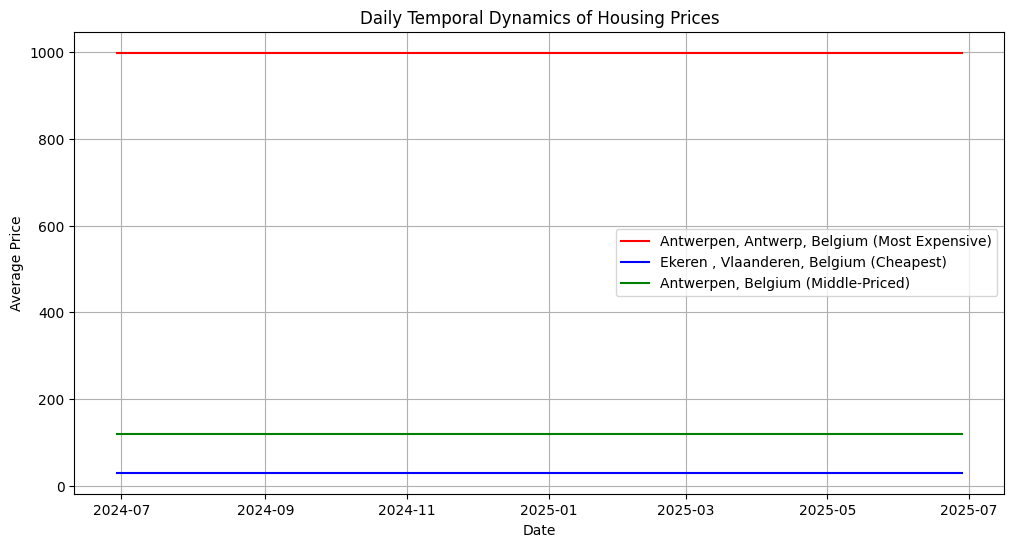

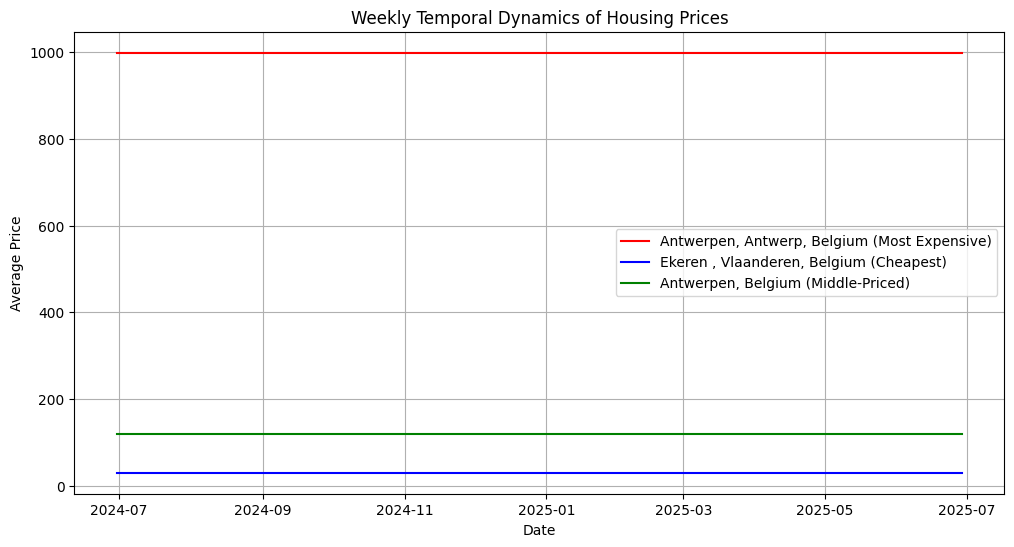

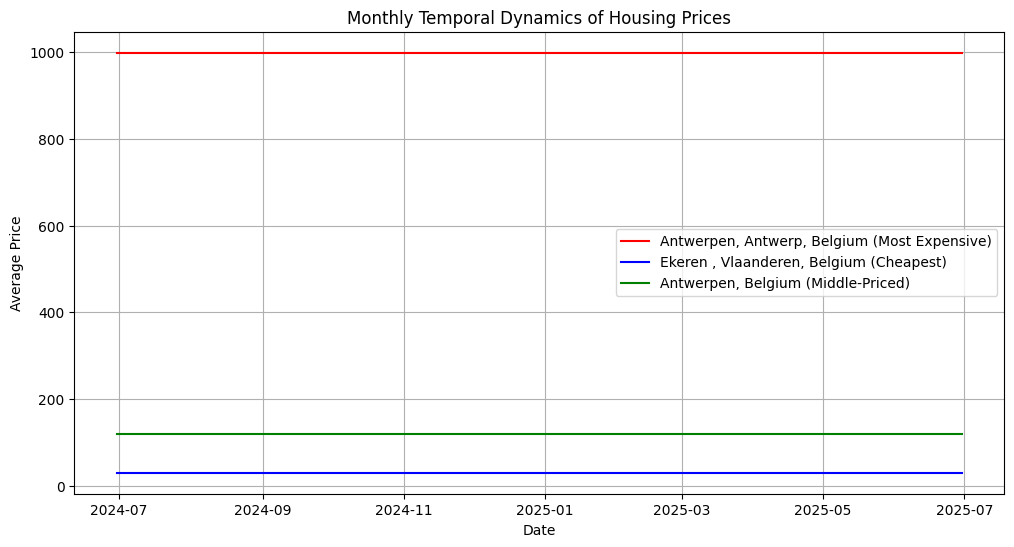

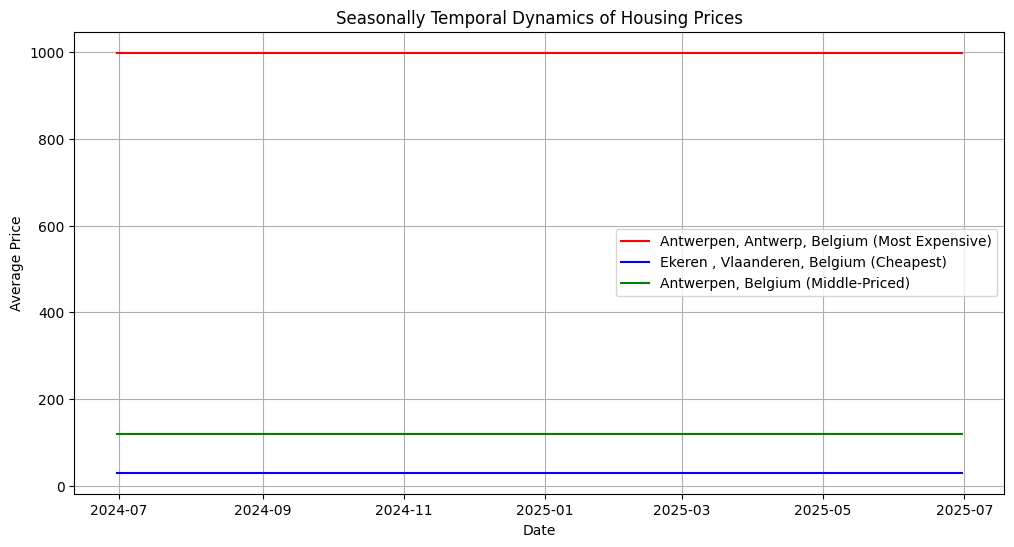

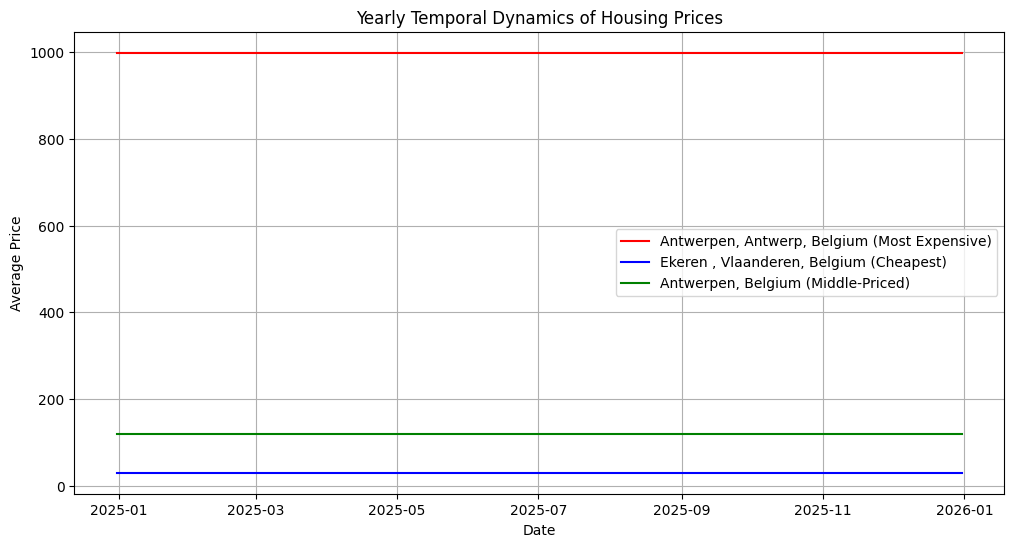

In [27]:
# Ensure the 'date' column is a datetime object
most_expensive_data['date'] = pd.to_datetime(most_expensive_data['date'])
cheapest_data['date'] = pd.to_datetime(cheapest_data['date'])
middle_data['date'] = pd.to_datetime(middle_data['date'])

# Resample the data
resampled_data = {}
for rule, label in resampling_rules.items():
    resampled_data[label] = {
        'most_expensive': most_expensive_data.set_index('date').resample(rule)['price'].mean(),
        'cheapest': cheapest_data.set_index('date').resample(rule)['price'].mean(),
        'middle': middle_data.set_index('date').resample(rule)['price'].mean()
    }

# Now you can proceed with the visualization
import matplotlib.pyplot as plt

# Plot the data for each resampling period
for label, data in resampled_data.items():
    plt.figure(figsize=(12, 6))
    plt.plot(data['most_expensive'].index, data['most_expensive'].values, label=f"{most_expensive_neighborhood} (Most Expensive)", color='red')
    plt.plot(data['cheapest'].index, data['cheapest'].values, label=f"{cheapest_neighborhood} (Cheapest)", color='blue')
    plt.plot(data['middle'].index, data['middle'].values, label=f"{middle_neighborhood} (Middle-Priced)", color='green')

    plt.title(f'{label} Temporal Dynamics of Housing Prices')
    plt.xlabel('Date')
    plt.ylabel('Average Price')
    plt.legend()
    plt.grid(True)
    plt.show()
    

In [29]:
# Check raw data for one neighborhood before resampling
print(most_expensive_data[['date', 'price']].sort_values(by='date').head(20))

# You can do the same for cheapest and middle neighborhoods

           date  price
1825 2024-06-29  999.0
1826 2024-06-30  999.0
1827 2024-07-01  999.0
1828 2024-07-02  999.0
1829 2024-07-03  999.0
1830 2024-07-04  999.0
1831 2024-07-05  999.0
1832 2024-07-06  999.0
1833 2024-07-07  999.0
1834 2024-07-08  999.0
1835 2024-07-09  999.0
1836 2024-07-10  999.0
1837 2024-07-11  999.0
1838 2024-07-12  999.0
1839 2024-07-13  999.0
1840 2024-07-14  999.0
1841 2024-07-15  999.0
1842 2024-07-16  999.0
1843 2024-07-17  999.0
1844 2024-07-18  999.0


In [31]:
# Check the cheapest neighborhood
print(cheapest_data[['date', 'price']].sort_values(by='date').head(20))

# Check the middle-priced neighborhood
print(middle_data[['date', 'price']].sort_values(by='date').head(20))

           date  price
4745 2024-06-29   30.0
4746 2024-06-30   30.0
4747 2024-07-01   30.0
4748 2024-07-02   30.0
4749 2024-07-03   30.0
4750 2024-07-04   30.0
4751 2024-07-05   30.0
4752 2024-07-06   30.0
4753 2024-07-07   30.0
4754 2024-07-08   30.0
4755 2024-07-09   30.0
4756 2024-07-10   30.0
4757 2024-07-11   30.0
4758 2024-07-12   30.0
4759 2024-07-13   30.0
4760 2024-07-14   30.0
4761 2024-07-15   30.0
4762 2024-07-16   30.0
4763 2024-07-17   30.0
4764 2024-07-18   30.0
           date       price
2190 2024-06-29  119.411765
2191 2024-06-30  119.411765
2192 2024-07-01  119.411765
2193 2024-07-02  119.411765
2194 2024-07-03  119.411765
2195 2024-07-04  119.411765
2196 2024-07-05  119.411765
2197 2024-07-06  119.411765
2198 2024-07-07  119.411765
2199 2024-07-08  119.411765
2200 2024-07-09  119.411765
2201 2024-07-10  119.411765
2202 2024-07-11  119.411765
2203 2024-07-12  119.411765
2204 2024-07-13  119.411765
2205 2024-07-14  119.411765
2206 2024-07-15  119.411765
2207 2024-07-

In [33]:
import pandas as pd

# Load the reviews data
reviews_df = pd.read_csv('reviews.csv')

# Inspect the first few rows of the DataFrame
print(reviews_df.head())

# Check the column names and data types
print(reviews_df.info())

# Summary statistics of the reviews
print(reviews_df.describe(include='all'))

   listing_id                  id        date  reviewer_id reviewer_name  \
0       50904            31511792  2015-05-06     19482395         Jihae   
1       50904  470101024356869935  2021-10-10       333559        Emilie   
2       50904  627287279025726941  2022-05-15     32701854     Marie-Lou   
3      224682              933043  2012-02-20      1422043  Hiske & Erik   
4      224682              970457  2012-03-05      1493171         Paolo   

                                            comments  
0  Karin’s “Aplace” is absolutely beautiful and c...  
1  Karin is a wonderful host, she was really help...  
2  The location is super super nice! Karin was al...  
3  Perfect location for exploring the city, close...  
4  Muriel was such a fantastic host, extremely he...  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116768 entries, 0 to 116767
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id

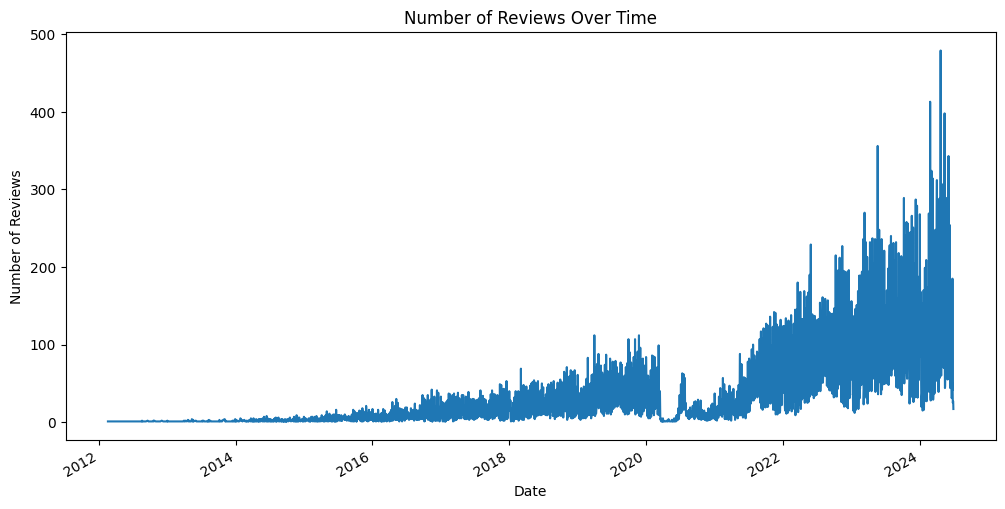

In [35]:
# Convert the review date to datetime format if it exists
if 'date' in reviews_df.columns:
    reviews_df['date'] = pd.to_datetime(reviews_df['date'])

    # Group by date to count the number of reviews over time
    reviews_per_day = reviews_df.groupby('date').size()

    # Plot the number of reviews over time
    reviews_per_day.plot(figsize=(12, 6), title='Number of Reviews Over Time', xlabel='Date', ylabel='Number of Reviews')

In [37]:
# If review scores exist
if 'review_scores_rating' in reviews_df.columns:
    reviews_df['review_scores_rating'].plot(kind='hist', bins=10, title='Distribution of Review Scores', xlabel='Review Score', ylabel='Frequency')

In [39]:
from textblob import TextBlob

# Assuming there's a column with the review text
if 'comments' in reviews_df.columns:
    reviews_df['sentiment'] = reviews_df['comments'].apply(lambda x: TextBlob(x).sentiment.polarity)

    # Plot the sentiment distribution
    reviews_df['sentiment'].plot(kind='hist', bins=50, title='Sentiment Distribution of Reviews', xlabel='Sentiment Polarity', ylabel='Frequency')

TypeError: The `text` argument passed to `__init__(text)` must be a string, not <class 'float'>

In [41]:
# Check if 'review_scores_rating' exists and contains data
if 'review_scores_rating' in reviews_df.columns:
    print(reviews_df['review_scores_rating'].dropna().head())
    if not reviews_df['review_scores_rating'].dropna().empty:
        reviews_df['review_scores_rating'].plot(kind='hist', bins=10, title='Distribution of Review Scores', xlabel='Review Score', ylabel='Frequency')
    else:
        print("The 'review_scores_rating' column is empty.")
else:
    print("'review_scores_rating' column does not exist.")

'review_scores_rating' column does not exist.


In [43]:
# List all columns in the reviews DataFrame
print(reviews_df.columns)

# Preview the first few rows of the DataFrame to understand its structure
print(reviews_df.head())

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')
   listing_id                  id       date  reviewer_id reviewer_name  \
0       50904            31511792 2015-05-06     19482395         Jihae   
1       50904  470101024356869935 2021-10-10       333559        Emilie   
2       50904  627287279025726941 2022-05-15     32701854     Marie-Lou   
3      224682              933043 2012-02-20      1422043  Hiske & Erik   
4      224682              970457 2012-03-05      1493171         Paolo   

                                            comments  
0  Karin’s “Aplace” is absolutely beautiful and c...  
1  Karin is a wonderful host, she was really help...  
2  The location is super super nice! Karin was al...  
3  Perfect location for exploring the city, close...  
4  Muriel was such a fantastic host, extremely he...  


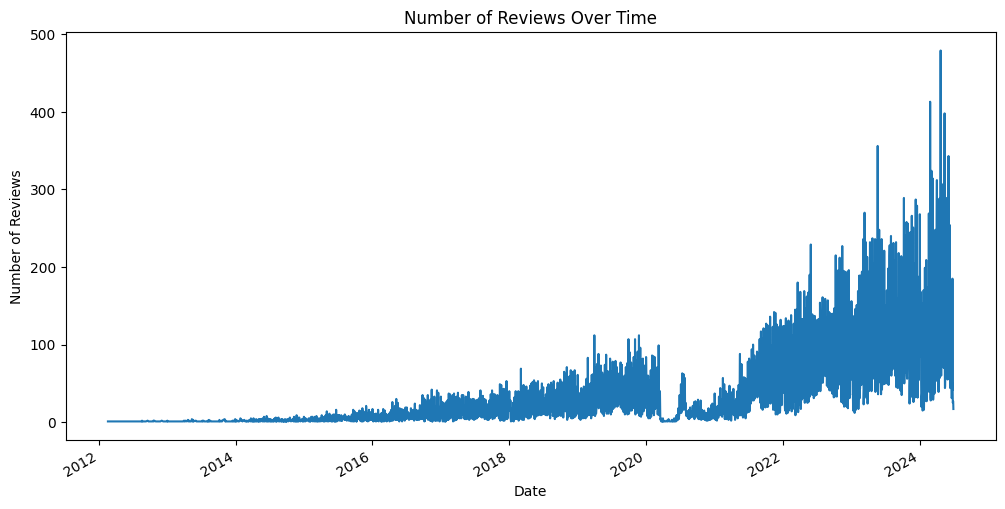

In [45]:
import matplotlib.pyplot as plt

# Convert 'date' to datetime format
reviews_df['date'] = pd.to_datetime(reviews_df['date'])

# Group by date to count the number of reviews over time
reviews_per_day = reviews_df.groupby('date').size()

# Plot the number of reviews over time
plt.figure(figsize=(12, 6))
reviews_per_day.plot(title='Number of Reviews Over Time', xlabel='Date', ylabel='Number of Reviews')
plt.show()

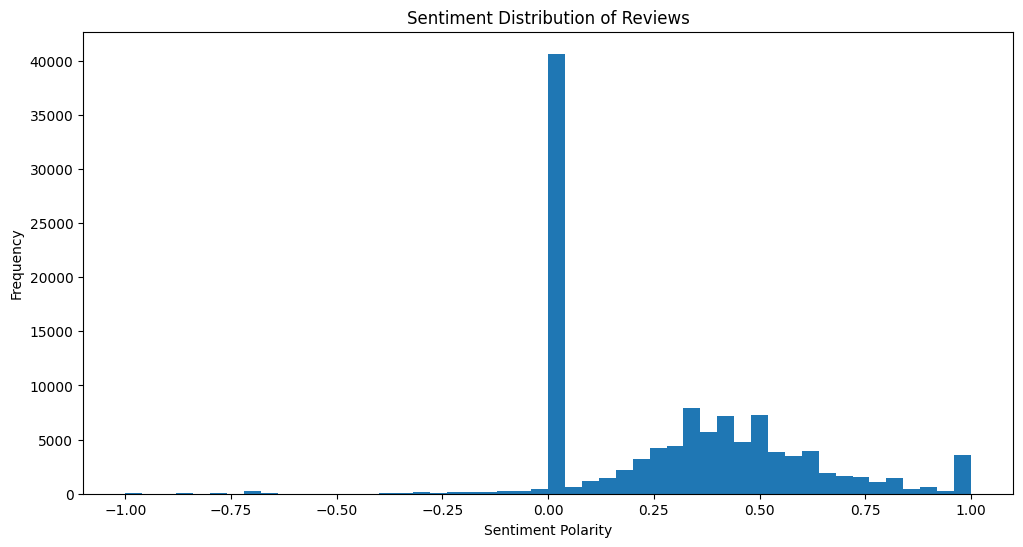

count    116768.000000
mean          0.290926
std           0.289602
min          -1.000000
25%           0.000000
50%           0.305333
75%           0.500000
max           1.000000
Name: sentiment, dtype: float64


In [47]:
from textblob import TextBlob

# Ensure the comments are treated as strings and handle any NaN values
reviews_df['comments'] = reviews_df['comments'].astype(str)

# Calculate sentiment polarity for each comment
reviews_df['sentiment'] = reviews_df['comments'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Plot the sentiment distribution
plt.figure(figsize=(12, 6))
reviews_df['sentiment'].plot(kind='hist', bins=50, title='Sentiment Distribution of Reviews', xlabel='Sentiment Polarity', ylabel='Frequency')
plt.show()

# Print basic sentiment statistics
print(reviews_df['sentiment'].describe())

In [51]:
from collections import Counter
import re
from itertools import chain

# Function to clean and split text into words
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\b\w{1,2}\b', '', text)  # Remove short words
    words = re.findall(r'\b\w+\b', text)
    return words

# Apply the cleaning function and collect words efficiently
cleaned_words = reviews_df['comments'].dropna().apply(clean_text)

# Flatten the list of lists into a single list of words using itertools.chain
all_words = chain.from_iterable(cleaned_words)

# Get the word frequency
word_freq = Counter(all_words).most_common(20)

# Print the 20 most common words
print("Most common words in reviews:")
for word, freq in word_freq:
    print(f"{word}: {freq}")

Most common words in reviews:
the: 116823
and: 97908
was: 62002
een: 43139
very: 37354
het: 35556
great: 25498
appartement: 25397
for: 25112
apartment: 24491
stay: 22767
place: 22582
with: 21084
you: 18896
location: 17874
van: 17711
nice: 16951
super: 16812
met: 16793
und: 16533


In [63]:
import spacy

# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")

# Function to clean and split text into words using spaCy
def clean_text_spacy(text):
    doc = nlp(text.lower())
    words = [token.text for token in doc if len(token.text) > 2]
    return words

# Apply the cleaning function and collect words efficiently
cleaned_words = reviews_df['comments'].dropna().apply(clean_text_spacy)

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject